## KNN 

#### You are who your friends are
The goal is not always to get better and better accuracy, but rather at what cost. We find a balance.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
df = pd.read_csv('wine.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
 13  is_red                6497 non-null   float64
 14  high_quality          6497 non-null   float64
dtypes: float64(13), int64

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [4]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,0.0,0.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0.0,0.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,0.0,0.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,0.0,1.0


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [91]:
X = df.drop(['high_quality'], axis = 1)
X.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'is_red'],
      dtype='object')

In [143]:
X1 = df[['alcohol','quality','sulphates','fixed_acidity', 'residual_sugar']]
X2 = df[['pH','is_red','chlorides']]
y = df['high_quality']

In [144]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=21)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=22)

In [145]:
X1_train_scaled = scaler.fit_transform(X1_train)
X2_train_scaled = scaler.fit_transform(X2_train)

X1_test_scaled = scaler.fit_transform(X1_test)
X2_test_scaled = scaler.fit_transform(X2_test)


In [146]:
knn = KNeighborsClassifier(n_neighbors=100)

In [147]:
knn.fit(X1_train_scaled, y1_train)

KNeighborsClassifier(n_neighbors=100)

In [148]:
y_pred = knn.predict(X1_test_scaled)

In [149]:
correct = np.where(y_pred == y1_test,1,0).sum()
accuracy = round(correct/len(y_test)*100,2)
accuracy

66.1

In [155]:
res = []
for k in range(1,100,3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X1_train_scaled, y1_train)
    y_pred = knn.predict(X1_test_scaled)
    correct = np.where(y_pred == y1_test,1,0).sum()
    accuracy = round(correct/len(y_test)*100,2)
    res.append([k,accuracy])
    print(f"Accuracy when k = {k} is {accuracy}")
    

Accuracy when k = 1 is 66.62
Accuracy when k = 4 is 66.56
Accuracy when k = 7 is 66.51
Accuracy when k = 10 is 66.56
Accuracy when k = 13 is 66.51
Accuracy when k = 16 is 66.56
Accuracy when k = 19 is 66.51
Accuracy when k = 22 is 66.56
Accuracy when k = 25 is 66.56
Accuracy when k = 28 is 66.41
Accuracy when k = 31 is 66.41
Accuracy when k = 34 is 66.36
Accuracy when k = 37 is 66.36
Accuracy when k = 40 is 66.31
Accuracy when k = 43 is 66.41
Accuracy when k = 46 is 66.36
Accuracy when k = 49 is 66.36
Accuracy when k = 52 is 66.26
Accuracy when k = 55 is 66.26
Accuracy when k = 58 is 66.31
Accuracy when k = 61 is 66.31
Accuracy when k = 64 is 66.31
Accuracy when k = 67 is 66.31
Accuracy when k = 70 is 66.31
Accuracy when k = 73 is 66.31
Accuracy when k = 76 is 66.21
Accuracy when k = 79 is 66.21
Accuracy when k = 82 is 66.15
Accuracy when k = 85 is 66.21
Accuracy when k = 88 is 66.1
Accuracy when k = 91 is 66.1
Accuracy when k = 94 is 66.1
Accuracy when k = 97 is 66.1


In [161]:
res = pd.DataFrame(res, columns = ["k","accuracy"])

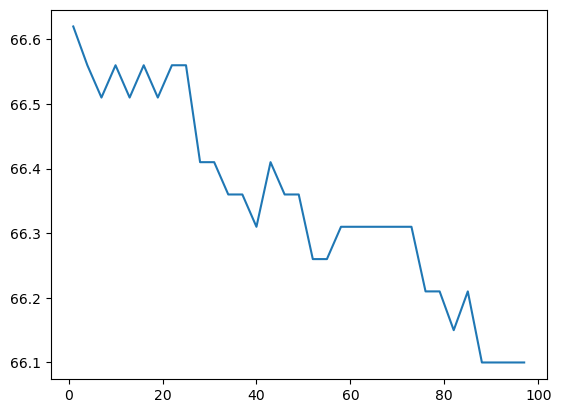

In [162]:
plt.plot(res['k'],res['accuracy'])

In [171]:
X_train, X_test, y_train, y_test = train_test_split(df[['density','sulphates','pH']], df['high_quality'], test_size=0.3)

In [164]:
X_train

,alcohol,quality,sulphates,fixed_acidity,residual_sugar
2609,10.3,6,0.75,7.6,1.4
259,10.5,7,0.80,10.0,2.6
6397,10.3,5,0.43,5.9,14.5
3867,8.5,6,0.40,6.3,5.9
5824,10.6,5,0.56,6.2,10.1
...,...,...,...,...,...
6154,9.6,5,0.44,6.8,11.8
723,9.5,5,1.62,7.1,2.2
5646,10.7,6,0.63,6.9,13.5
4069,9.5,5,0.51,7.6,1.3


In [165]:
knn = KNeighborsClassifier(n_neighbors=4500)

In [166]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4500)

In [167]:
prediction = knn.predict(X_test)

In [168]:
correct = np.where(prediction==y_test,1,0).sum()

In [169]:
correct

1591

In [170]:
accuracy = correct/len(y_test)
accuracy

0.8158974358974359

What if you got lucky? We don't even know if neighbours was good?

In [18]:
res = []

In [19]:
for k in range(1,51,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    correct = np.where(prediction==y_test,1,0).sum()
    accuracy = correct/len(y_test)
    
    print(f"For {k}, the accuracy is {accuracy}")
    res.append([k,accuracy])


For 1, the accuracy is 0.8112820512820513
For 3, the accuracy is 0.7933333333333333
For 5, the accuracy is 0.8035897435897436
For 7, the accuracy is 0.7979487179487179
For 9, the accuracy is 0.7994871794871795
For 11, the accuracy is 0.7984615384615384
For 13, the accuracy is 0.7958974358974359
For 15, the accuracy is 0.7984615384615384
For 17, the accuracy is 0.8056410256410257
For 19, the accuracy is 0.8025641025641026
For 21, the accuracy is 0.8020512820512821
For 23, the accuracy is 0.8041025641025641
For 25, the accuracy is 0.8015384615384615
For 27, the accuracy is 0.7984615384615384
For 29, the accuracy is 0.7979487179487179
For 31, the accuracy is 0.7979487179487179
For 33, the accuracy is 0.798974358974359
For 35, the accuracy is 0.8
For 37, the accuracy is 0.8005128205128205
For 39, the accuracy is 0.801025641025641
For 41, the accuracy is 0.8020512820512821
For 43, the accuracy is 0.8020512820512821
For 45, the accuracy is 0.8020512820512821
For 47, the accuracy is 0.8035897

In [20]:
res

[[1, 0.8112820512820513],
 [3, 0.7933333333333333],
 [5, 0.8035897435897436],
 [7, 0.7979487179487179],
 [9, 0.7994871794871795],
 [11, 0.7984615384615384],
 [13, 0.7958974358974359],
 [15, 0.7984615384615384],
 [17, 0.8056410256410257],
 [19, 0.8025641025641026],
 [21, 0.8020512820512821],
 [23, 0.8041025641025641],
 [25, 0.8015384615384615],
 [27, 0.7984615384615384],
 [29, 0.7979487179487179],
 [31, 0.7979487179487179],
 [33, 0.798974358974359],
 [35, 0.8],
 [37, 0.8005128205128205],
 [39, 0.801025641025641],
 [41, 0.8020512820512821],
 [43, 0.8020512820512821],
 [45, 0.8020512820512821],
 [47, 0.8035897435897436],
 [49, 0.803076923076923]]

In [23]:
data = pd.DataFrame(res, columns=['k','accuracy'])

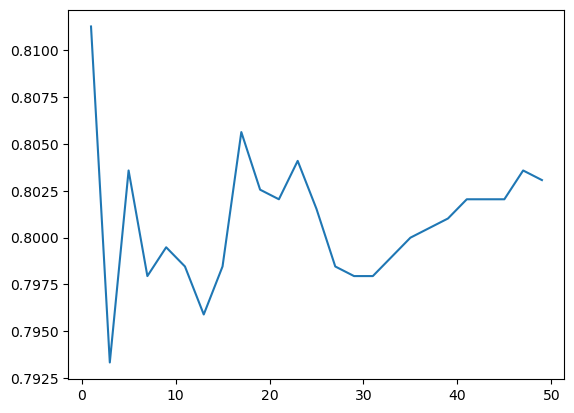

In [24]:
plt.plot(data.k, data.accuracy)